<a href="https://colab.research.google.com/github/Itiel-z/Intro-to-AI-colab/blob/main/Assignment_9/Assignment_9_Intro2AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 9 - Itiel

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Data Collection and Loading ---

In [11]:
#  Load Dataset
url = "https://raw.githubusercontent.com/PhilipUit/Wholesale_Customer_Data/main/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# --- Quick Check of Data ---

In [10]:
# Display the first few rows of the dataset to understand its structure.
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
# Check the features and target variable. Identify which is continuous and categorical if applicable
print(f'Below if the basic information about the structure of the dataset:\n')
df.info()
print(f'Below is the summary statistics of the dataset:\n')
df.describe()

Below if the basic information about the structure of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
Below is the summary statistics of the dataset:



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


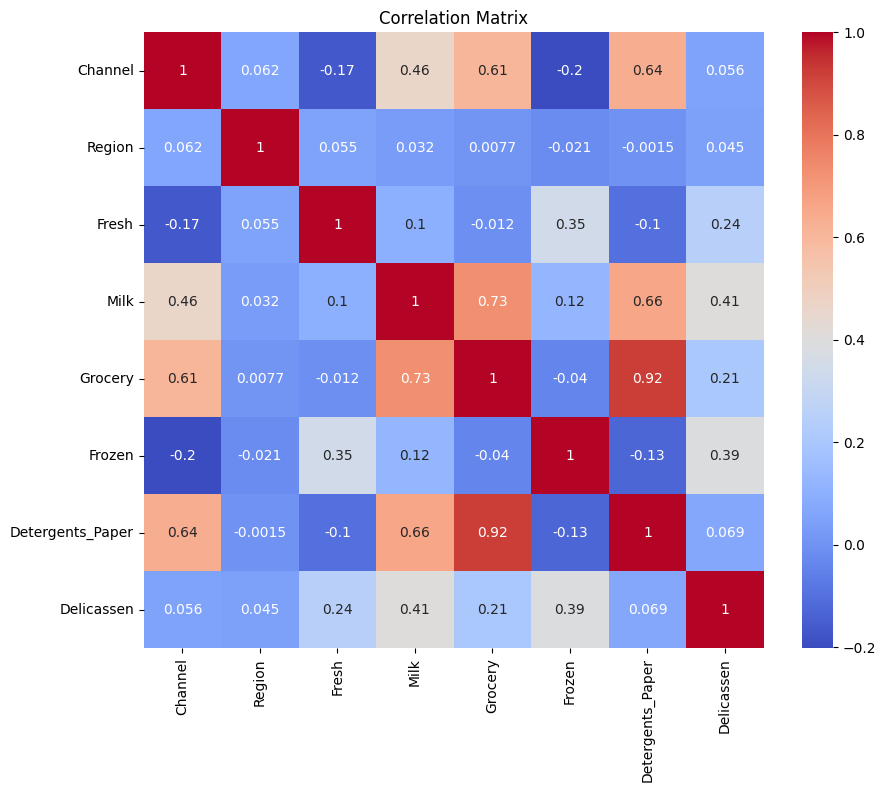

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ----------Data Preprocessing----------

In [15]:
# Feature selection (drop the categorical columns)
X = df.drop(columns=['Channel', 'Region'])

In [16]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------Clustering----------

In [17]:
# Determine Optimal K using Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

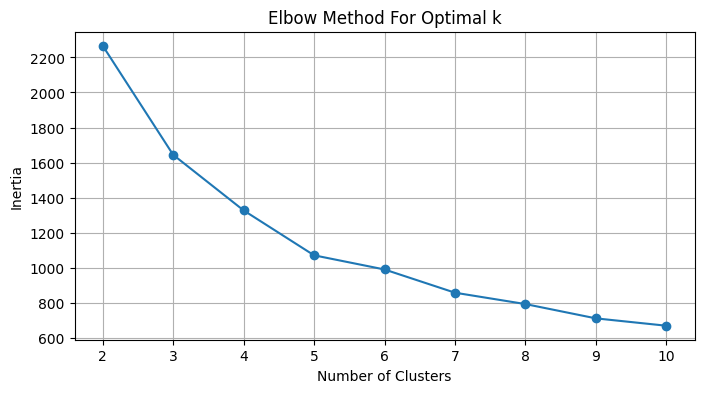

In [18]:
# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [22]:
# KMeans with  k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

KMeans Silhouette Score: 0.36890127429678043


In [ ]:
# KMeans with k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

KMeans Silhouette Score: 0.36890127429678043


In [28]:
# KMeans with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print("KMeans Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))

KMeans Silhouette Score: 0.4582633767207058


K = 3 has the best score therefore, we will work with 3 clusters

In [26]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

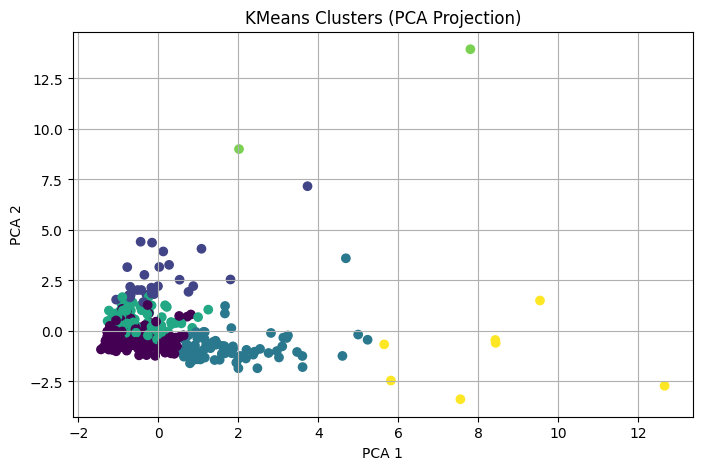

In [27]:
# Visualize KMeans Clusters with PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

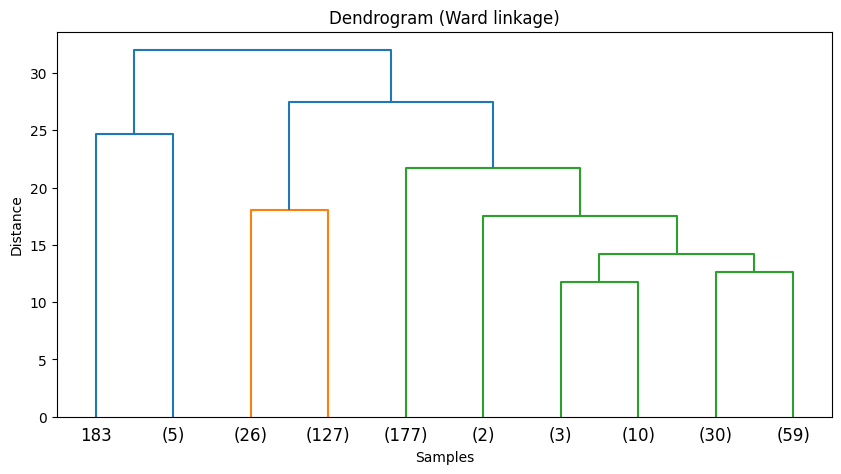

In [29]:
# Hierarchical Clustering - Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [32]:
# Agglomerative Clustering (3 clusters)
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaled)
print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_scaled, hc_labels))

Agglomerative Clustering Silhouette Score: 0.23988371669170097


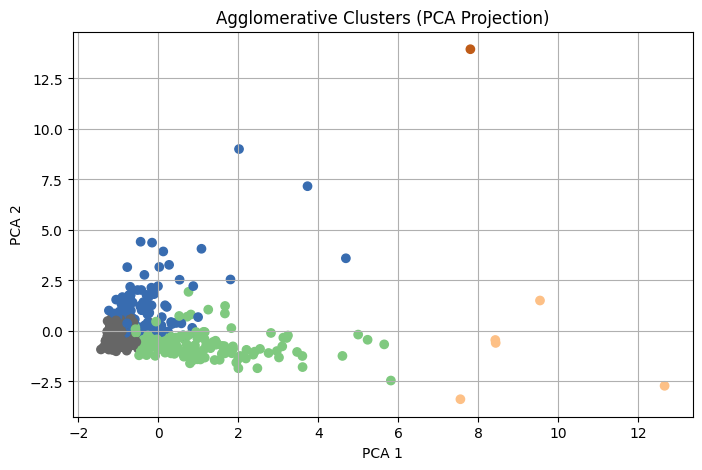

In [33]:
# Visualize Agglomerative Clusters with PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='Accent')
plt.title('Agglomerative Clusters (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()